In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create DataFrames from the provided data for HDFC Bank
# Profit & Loss data
pl_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
                   '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Sales': [63161.56, 73271.35, 85287.84, 105160.74, 122189.29, 128552.4, 135936.41, 170754.05, 283649.02, 336367.43],
    'Net profit': [12801.33, 15280.48, 18510.02, 22332.43, 27253.95, 31833.21, 38052.75, 45997.11, 64062.04, 70792.25],
    'Interest': [34069.57, 38041.58, 42381.48, 53712.69, 62137.42, 59247.59, 58584.33, 77779.94, 154138.55, 183894.2],
    'Profit before tax': [19510.99, 23392.97, 28463.92, 34318.16, 38194.86, 42796.15, 50873.38, 61498.39, 76568.6, 96242.05]
}

# Balance Sheet data
bs_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
                   '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Equity Share Capital': [505.64, 512.51, 519.02, 544.66, 548.33, 551.28, 554.55, 557.97, 759.69, 765.22],
    'Reserves': [73798.49, 91281.44, 109080.11, 153128, 175810.38, 209258.9, 246771.62, 288879.53, 455635.56, 521024.17],
    'Borrowings': [649587.25, 741549.89, 944817.22, 1080235.46, 1333041.45, 1511417.62, 1784969.53, 2139211.91, 3107502.74, 3345503.8],
    'Other Liabilities': [38320.95, 59000.32, 48769.82, 58897.59, 71430.27, 78278.83, 90638.6, 101783.03, 466296.27, 524816.64],
    'Total': [762212.33, 892344.16, 1103186.17, 1292805.71, 1580830.43, 1799506.63, 2122934.3, 2530432.44, 4030194.26, 4392109.83],
    'Cash & Bank': [24488.85, 33633.28, 97138.14, 39372.13, 62997.42, 86648.17, 118791.2, 103917.93, 165658.59, 132227.37],
    'Investments': [193633.85, 210777.11, 238460.92, 289445.87, 389304.95, 438823.11, 449263.86, 511581.71, 1005681.63, 1186472.89],
    'Other Assets': [564911.62, 677567.35, 860717.12, 998991.21, 1186749.83, 1355435.17, 1667238.37, 2010419.38, 3011908.87, 3190379]
}

# Market data
market_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Share Price': [267.79, 360.64, 471.53, 579.73, 430.95, 746.83, 735.18, 804.78, 723.95, 914.1],
    'Adjusted Equity Shares (Cr)': [1011.28,  1025.02, 1038.04, 1089.32, 1096.66, 1102.56, 1109.11, 1115.95, 1519.38, 1530.44]
}

pl_df = pd.DataFrame(pl_data)
bs_df = pd.DataFrame(bs_data)
market_df = pd.DataFrame(market_data)

# Convert to numeric and set date as index
for df in [pl_df, bs_df, market_df]:
    for col in df.columns:
        if col != 'Report Date':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    df.set_index('Report Date', inplace=True)

# Calculate ratios
ratios = {}

# 1. Return on Equity (ROE) = Net Income / Equity
ratios['ROE'] = pl_df['Net profit'] / (bs_df['Equity Share Capital'] + bs_df['Reserves'])

# 2. Net Profit Margin = Net Income / Revenue
ratios['Net Profit Margin'] = pl_df['Net profit'] / pl_df['Sales']

# 3. Return on Assets (ROA) = Net Income / Total Assets
ratios['ROA'] = pl_df['Net profit'] / bs_df['Total']

# 4. Debt-to-Equity Ratio = Total Debt / Shareholders' Equity
ratios['Debt-to-Equity'] = bs_df['Borrowings'] / (bs_df['Equity Share Capital'] + bs_df['Reserves'])

# 5. Interest Coverage Ratio = EBIT / Interest Expense
ratios['Interest Coverage'] = (pl_df['Profit before tax'] + pl_df['Interest']) / pl_df['Interest']

# 6. Debt Ratio = Total Debt / Total Assets
ratios['Debt Ratio'] = bs_df['Borrowings'] / bs_df['Total']

# 7. Asset Turnover = Net Sales / Average Total Assets
bs_df['Total Assets Avg'] = bs_df['Total'].rolling(window=2).mean()
ratios['Asset Turnover'] = pl_df['Sales'] / bs_df['Total Assets Avg']

# 8. Current Ratio = Current Assets / Current Liabilities
# For banks, we'll use: Current Assets ≈ Cash & Bank + Investments (liquid assets)
# Current Liabilities = Other Liabilities (short-term obligations)
ratios['Current Ratio'] = (bs_df['Cash & Bank'] + bs_df['Investments']) / bs_df['Other Liabilities']

# 9. Quick Ratio = (Current Assets – Inventory) / Current Liabilities
# Since banks don't have inventory, Quick Ratio = Current Ratio
ratios['Quick Ratio'] = ratios['Current Ratio']

# 10. Cash Ratio = Cash & Cash Equivalents / Current Liabilities
ratios['Cash Ratio'] = bs_df['Cash & Bank'] / bs_df['Other Liabilities']

# 11. P-E Ratio = Share Price / EPS
# EPS = Net Profit / Number of Shares (converted to Cr units)
ratios['EPS'] = pl_df['Net profit'] / market_df['Adjusted Equity Shares (Cr)']
ratios['P-E Ratio'] = market_df['Share Price'] / ratios['EPS']

# Create ratios DataFrame
ratios_df = pd.DataFrame(ratios)
ratios_df = ratios_df.round(4)


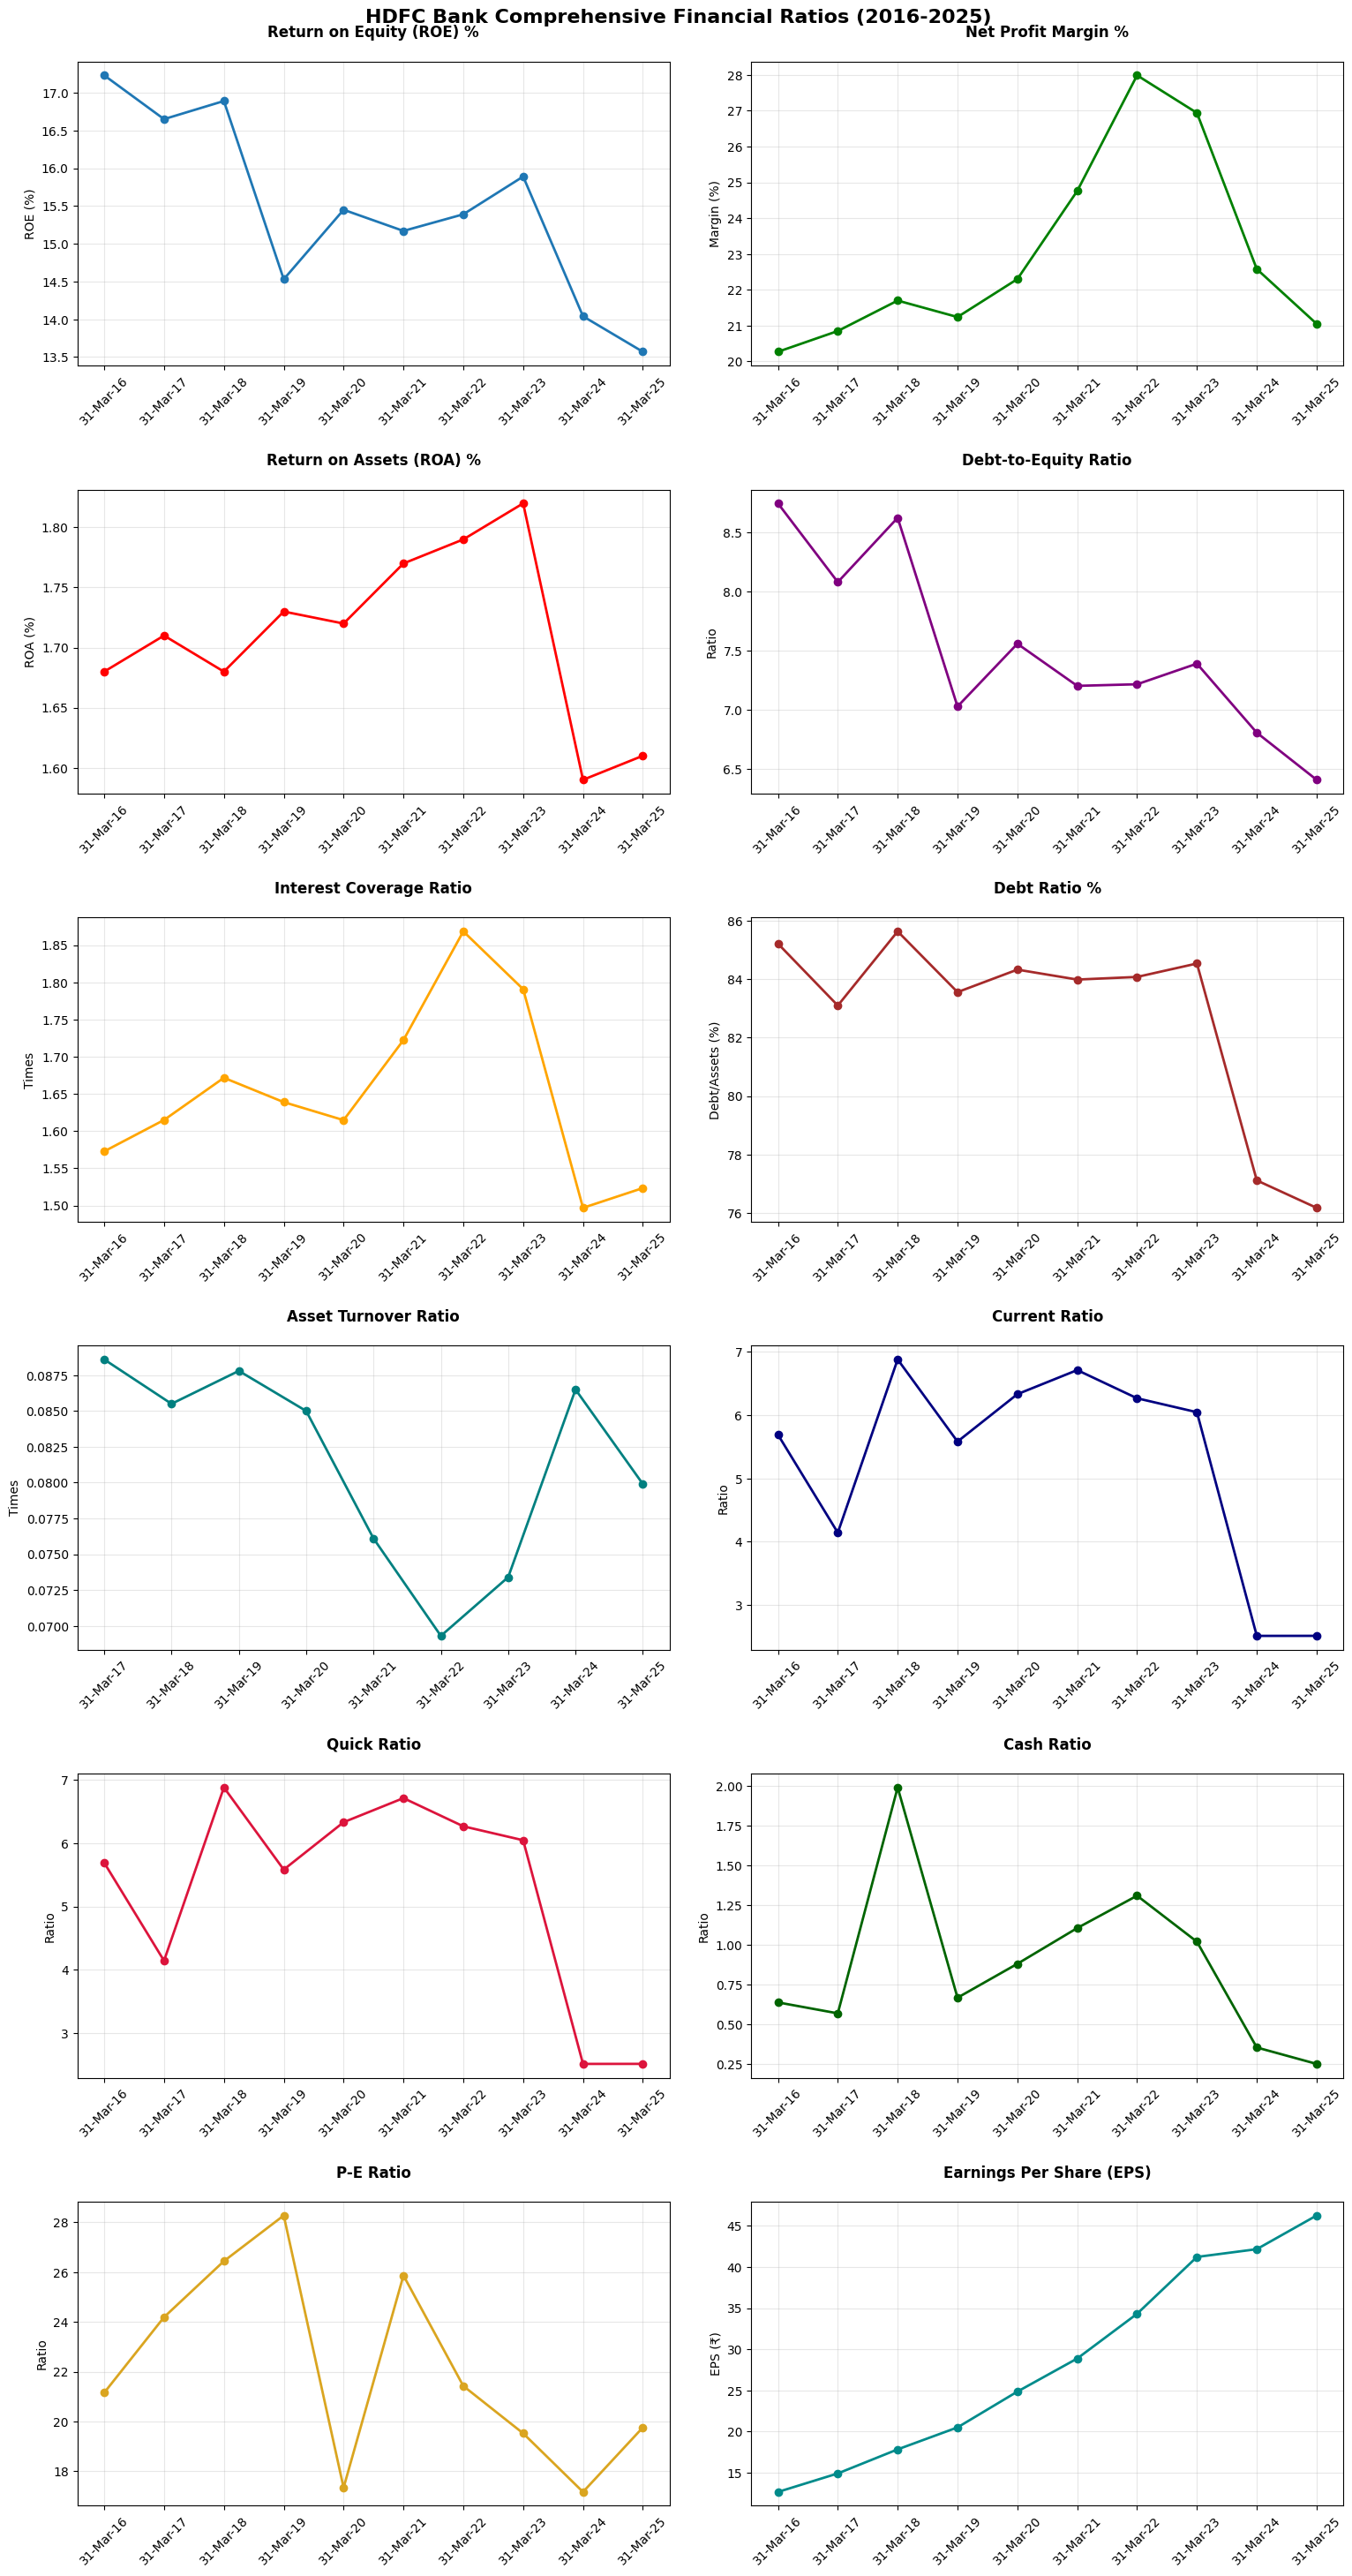

HDFC Bank Comprehensive Financial Ratios (2016-2025)
                ROE  Net Profit Margin     ROA  Debt-to-Equity  \
Report Date                                                      
31-Mar-16    0.1723             0.2027  0.0168          8.7423   
31-Mar-17    0.1665             0.2085  0.0171          8.0784   
31-Mar-18    0.1689             0.2170  0.0168          8.6207   
31-Mar-19    0.1453             0.2124  0.0173          7.0295   
31-Mar-20    0.1545             0.2230  0.0172          7.5587   
31-Mar-21    0.1517             0.2476  0.0177          7.2037   
31-Mar-22    0.1539             0.2799  0.0179          7.2171   
31-Mar-23    0.1589             0.2694  0.0182          7.3909   
31-Mar-24    0.1404             0.2258  0.0159          6.8088   
31-Mar-25    0.1357             0.2105  0.0161          6.4116   

             Interest Coverage  Debt Ratio  Asset Turnover  Current Ratio  \
Report Date                                                                 


In [6]:

# Create comprehensive visualizations with proper spacing
fig, axes = plt.subplots(6, 2, figsize=(16, 30))
fig.suptitle('HDFC Bank Comprehensive Financial Ratios (2016-2025)', 
             fontsize=16, fontweight='bold', y=0.98)

# ROE
axes[0,0].plot(ratios_df.index, ratios_df['ROE'] * 100, marker='o', linewidth=2, markersize=6)
axes[0,0].set_title('Return on Equity (ROE) %', fontweight='bold', pad=20)
axes[0,0].set_ylabel('ROE (%)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Net Profit Margin
axes[0,1].plot(ratios_df.index, ratios_df['Net Profit Margin'] * 100, marker='o', linewidth=2, markersize=6, color='green')
axes[0,1].set_title('Net Profit Margin %', fontweight='bold', pad=20)
axes[0,1].set_ylabel('Margin (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# ROA
axes[1,0].plot(ratios_df.index, ratios_df['ROA'] * 100, marker='o', linewidth=2, markersize=6, color='red')
axes[1,0].set_title('Return on Assets (ROA) %', fontweight='bold', pad=20)
axes[1,0].set_ylabel('ROA (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Debt-to-Equity
axes[1,1].plot(ratios_df.index, ratios_df['Debt-to-Equity'], marker='o', linewidth=2, markersize=6, color='purple')
axes[1,1].set_title('Debt-to-Equity Ratio', fontweight='bold', pad=20)
axes[1,1].set_ylabel('Ratio')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Interest Coverage
axes[2,0].plot(ratios_df.index, ratios_df['Interest Coverage'], marker='o', linewidth=2, markersize=6, color='orange')
axes[2,0].set_title('Interest Coverage Ratio', fontweight='bold', pad=20)
axes[2,0].set_ylabel('Times')
axes[2,0].tick_params(axis='x', rotation=45)
axes[2,0].grid(True, alpha=0.3)

# Debt Ratio
axes[2,1].plot(ratios_df.index, ratios_df['Debt Ratio'] * 100, marker='o', linewidth=2, markersize=6, color='brown')
axes[2,1].set_title('Debt Ratio %', fontweight='bold', pad=20)
axes[2,1].set_ylabel('Debt/Assets (%)')
axes[2,1].tick_params(axis='x', rotation=45)
axes[2,1].grid(True, alpha=0.3)

# Asset Turnover
axes[3,0].plot(ratios_df.index[1:], ratios_df['Asset Turnover'][1:], marker='o', linewidth=2, markersize=6, color='teal')
axes[3,0].set_title('Asset Turnover Ratio', fontweight='bold', pad=20)
axes[3,0].set_ylabel('Times')
axes[3,0].tick_params(axis='x', rotation=45)
axes[3,0].grid(True, alpha=0.3)

# Current Ratio
axes[3,1].plot(ratios_df.index, ratios_df['Current Ratio'], marker='o', linewidth=2, markersize=6, color='navy')
axes[3,1].set_title('Current Ratio', fontweight='bold', pad=20)
axes[3,1].set_ylabel('Ratio')
axes[3,1].tick_params(axis='x', rotation=45)
axes[3,1].grid(True, alpha=0.3)

# Quick Ratio
axes[4,0].plot(ratios_df.index, ratios_df['Quick Ratio'], marker='o', linewidth=2, markersize=6, color='crimson')
axes[4,0].set_title('Quick Ratio', fontweight='bold', pad=20)
axes[4,0].set_ylabel('Ratio')
axes[4,0].tick_params(axis='x', rotation=45)
axes[4,0].grid(True, alpha=0.3)

# Cash Ratio
axes[4,1].plot(ratios_df.index, ratios_df['Cash Ratio'], marker='o', linewidth=2, markersize=6, color='darkgreen')
axes[4,1].set_title('Cash Ratio', fontweight='bold', pad=20)
axes[4,1].set_ylabel('Ratio')
axes[4,1].tick_params(axis='x', rotation=45)
axes[4,1].grid(True, alpha=0.3)

# P-E Ratio
axes[5,0].plot(ratios_df.index, ratios_df['P-E Ratio'], marker='o', linewidth=2, markersize=6, color='goldenrod')
axes[5,0].set_title('P-E Ratio', fontweight='bold', pad=20)
axes[5,0].set_ylabel('Ratio')
axes[5,0].tick_params(axis='x', rotation=45)
axes[5,0].grid(True, alpha=0.3)

# EPS
axes[5,1].plot(ratios_df.index, ratios_df['EPS'], marker='o', linewidth=2, markersize=6, color='darkcyan')
axes[5,1].set_title('Earnings Per Share (EPS)', fontweight='bold', pad=20)
axes[5,1].set_ylabel('EPS (₹)')
axes[5,1].tick_params(axis='x', rotation=45)
axes[5,1].grid(True, alpha=0.3)

# Adjust layout with more padding
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)
plt.subplots_adjust(top=0.96)  # Additional space for the main title

plt.show()

# Display the ratios table
print("HDFC Bank Comprehensive Financial Ratios (2016-2025)")
print("="*90)
print(ratios_df)

# Prepare CSV output
ratios_csv = ratios_df.copy()
ratios_csv.reset_index(inplace=True)
print("\n" + "="*90)
print("CSV Data Ready for Export:")
print("="*90)
print(ratios_csv.to_string(index=False))

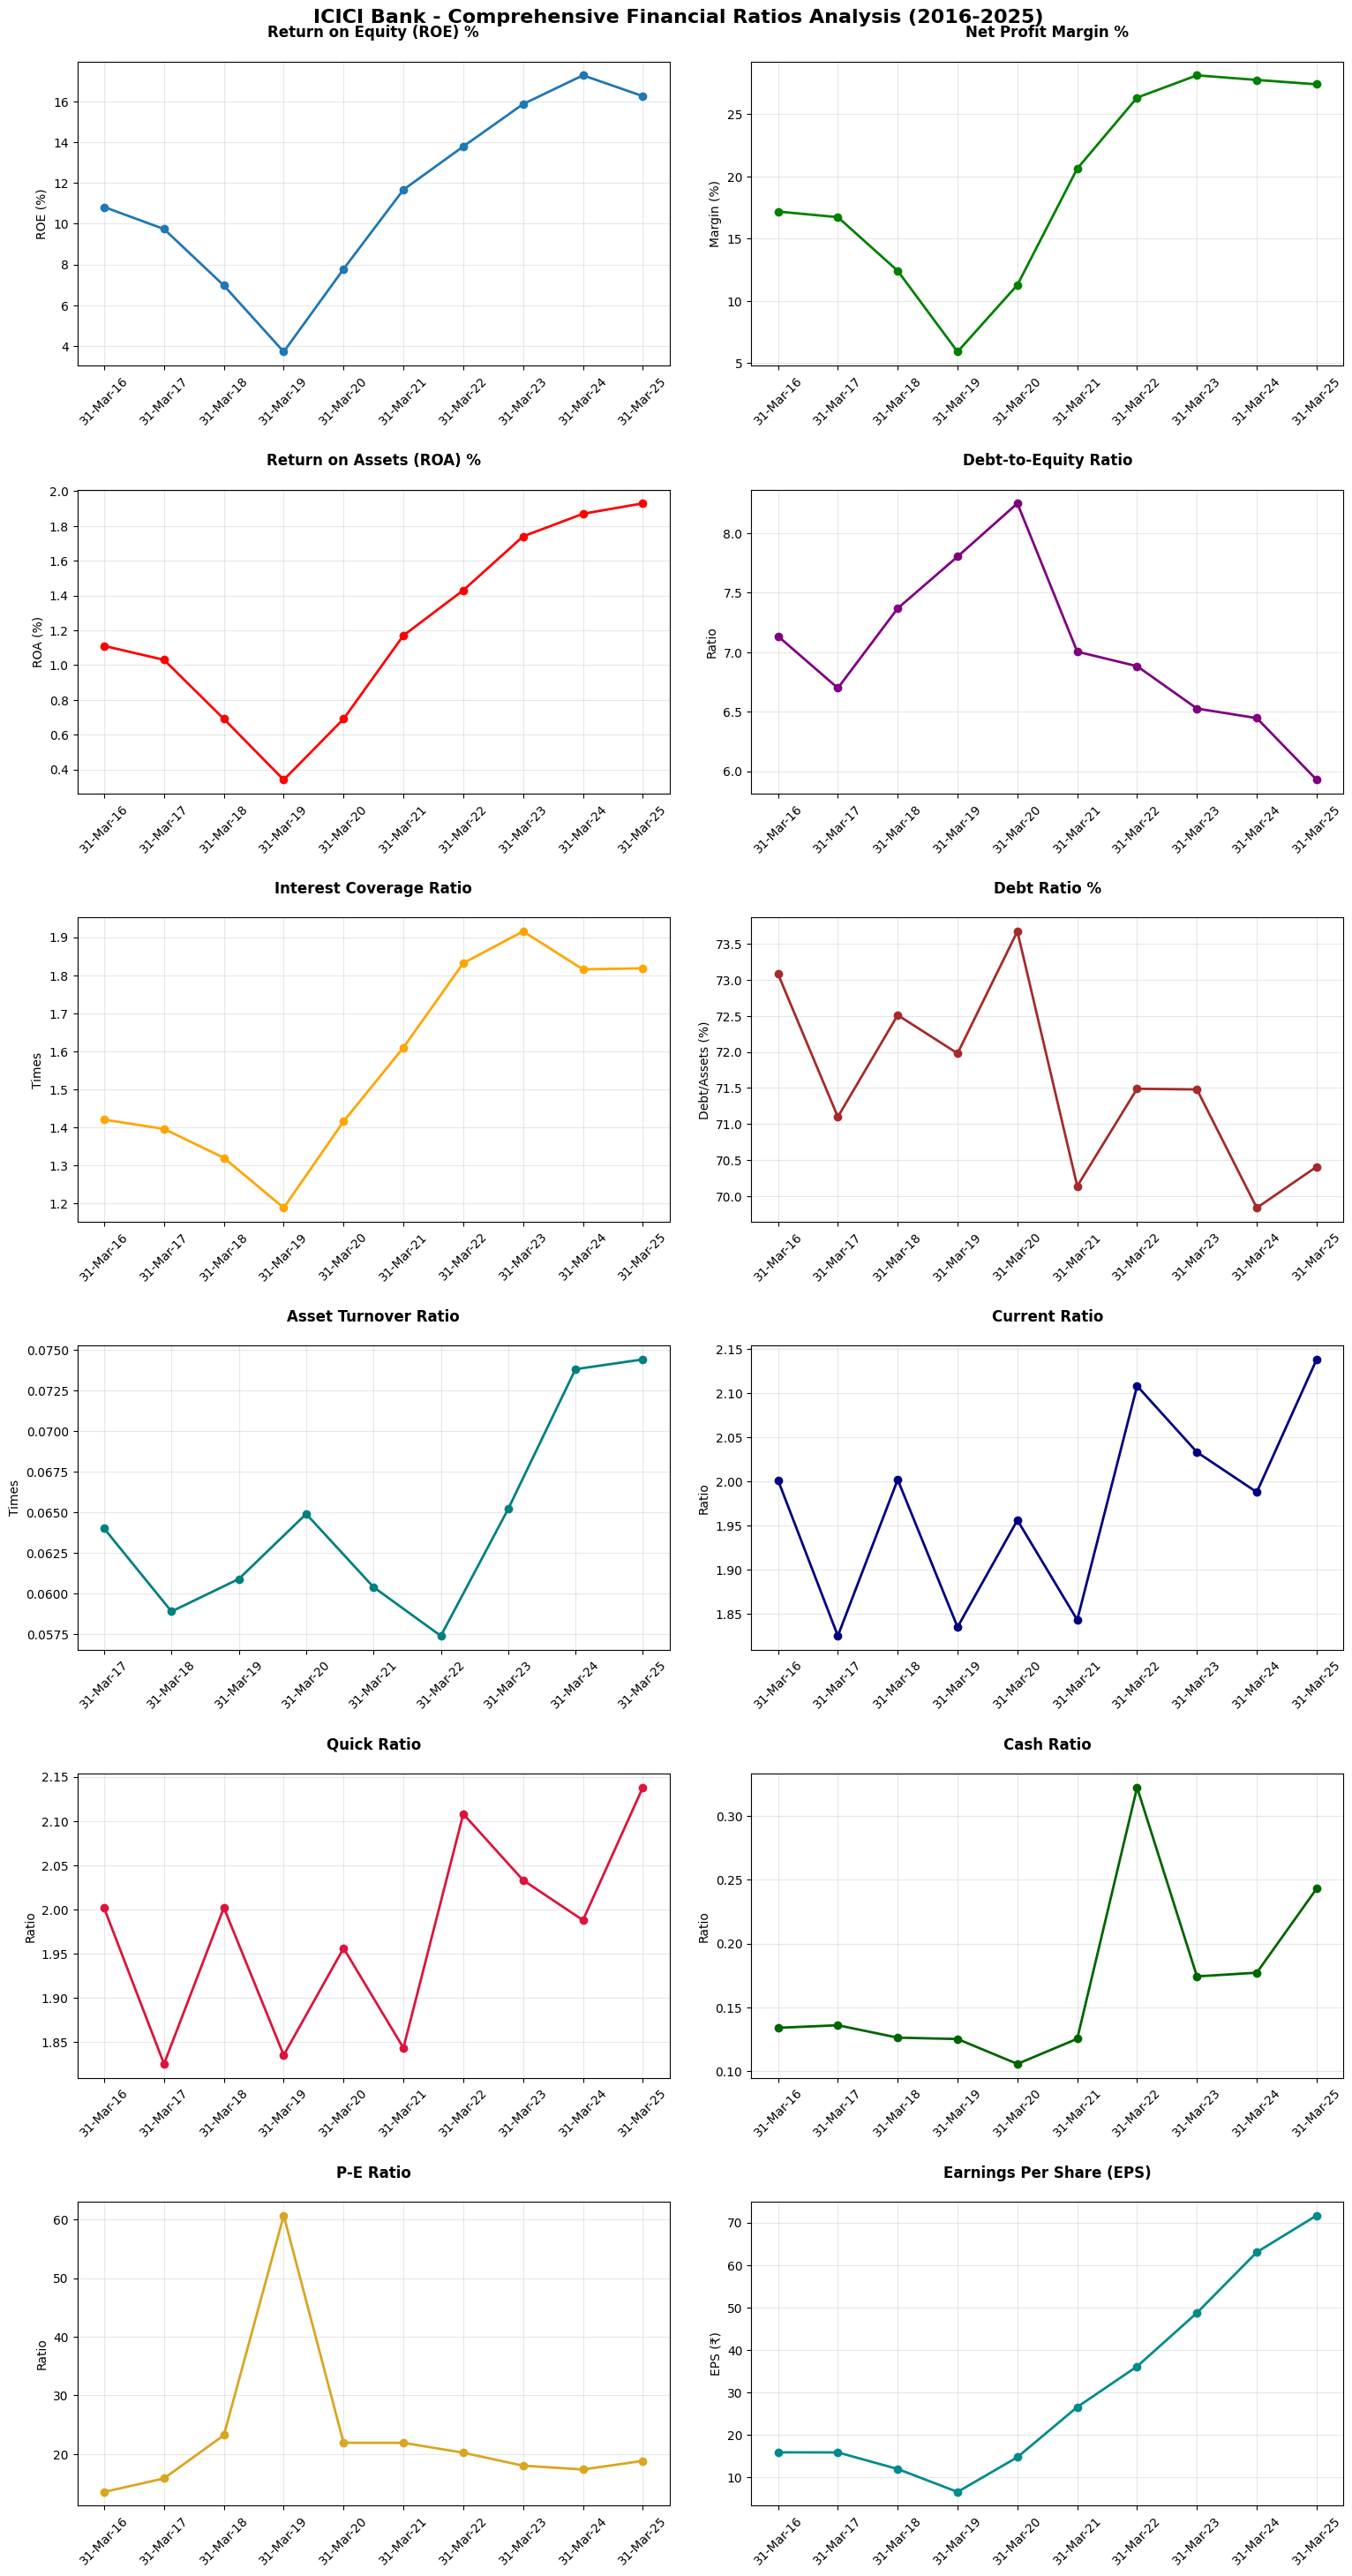

ICICI Bank Comprehensive Financial Ratios (2016-2025)
                ROE  Net Profit Margin     ROA  Debt-to-Equity  \
Report Date                                                      
31-Mar-16    0.1082             0.1717  0.0111          7.1347   
31-Mar-17    0.0974             0.1672  0.0103          6.6985   
31-Mar-18    0.0697             0.1241  0.0069          7.3687   
31-Mar-19    0.0372             0.0591  0.0034          7.8041   
31-Mar-20    0.0778             0.1128  0.0069          8.2518   
31-Mar-21    0.1167             0.2062  0.0117          7.0046   
31-Mar-22    0.1379             0.2632  0.0143          6.8825   
31-Mar-23    0.1587             0.2811  0.0174          6.5264   
31-Mar-24    0.1728             0.2774  0.0187          6.4456   
31-Mar-25    0.1626             0.2739  0.0193          5.9270   

             Interest Coverage  Debt Ratio  Asset Turnover  Current Ratio  \
Report Date                                                                 

In [6]:
# Create DataFrames from the provided ICICI Bank data
# Profit & Loss data
pl_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
                   '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Sales': [59293.71, 60939.98, 62162.35, 71981.65, 84835.77, 89162.66, 95406.87, 121066.81, 159515.93, 186331.46],
    'Net profit': [10179.96, 10188.38, 7712.19, 4254.24, 9566.31, 18384.32, 25110.1, 34036.64, 44256.37, 51029.2],
    'Interest': [33996.47, 34835.83, 34262.05, 39177.54, 44665.52, 42659.09, 41166.67, 50543.39, 74108.16, 89027.65],
    'Profit before tax': [14304.39, 13809.35, 10978.47, 7408.26, 18588.61, 26028.34, 34241.27, 46256.47, 60434.37, 72853.54]
}

# Balance Sheet data
bs_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
                   '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Equity Share Capital': [1163.17, 1165.11, 1285.81, 1289.46, 1294.76, 1383.41, 1389.97, 1396.78, 1404.68, 1424.6],
    'Reserves': [92947.55, 103466.89, 109343.89, 112963.95, 121665.3, 156204.09, 180662.52, 213101.01, 254739.16, 312481.31],
    'Borrowings': [671455.05, 700874.02, 815197.94, 891641.06, 1014636.24, 1103839.96, 1252968.47, 1399893.96, 1651007.95, 1860520.85],
    'Other Liabilities': [153190.43, 180218.63, 198453.41, 232899.42, 239695.93, 312384.79, 317616.42, 344098.75, 456911.23, 467814.65],
    'Total': [918756.2, 985724.65, 1124281.05, 1238793.89, 1377292.23, 1573812.25, 1752637.38, 1958490.5, 2364063.02, 2642241.41],
    'Cash & Bank': [20529.82, 24508.71, 25060.72, 29154.9, 25342.11, 39160.51, 102403.23, 59967.64, 80987.18, 113747.23],
    'Investments': [286044.09, 304373.29, 372207.68, 398200.76, 443472.63, 536578.62, 567097.72, 639551.97, 827162.51, 886376.81]
}

# Market data
market_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
                   '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Share Price': [215.14, 251.68, 278.35, 400.5, 323.75, 582.1, 730.3, 877.25, 1093.3, 1348.35],
    'Adjusted Equity Shares (Cr)': [639.62, 640.69, 642.80, 644.62, 647.28, 691.60, 694.88, 698.28, 702.23, 712.19]
}

pl_df = pd.DataFrame(pl_data)
bs_df = pd.DataFrame(bs_data)
market_df = pd.DataFrame(market_data)

# Convert to numeric and set date as index
for df in [pl_df, bs_df, market_df]:
    for col in df.columns:
        if col != 'Report Date':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    df.set_index('Report Date', inplace=True)

# Calculate ratios
ratios = {}

# 1. Return on Equity (ROE) = Net Income / Equity
ratios['ROE'] = pl_df['Net profit'] / (bs_df['Equity Share Capital'] + bs_df['Reserves'])

# 2. Net Profit Margin = Net Income / Revenue
ratios['Net Profit Margin'] = pl_df['Net profit'] / pl_df['Sales']

# 3. Return on Assets (ROA) = Net Income / Total Assets
ratios['ROA'] = pl_df['Net profit'] / bs_df['Total']

# 4. Debt-to-Equity Ratio = Total Debt / Shareholders' Equity
ratios['Debt-to-Equity'] = bs_df['Borrowings'] / (bs_df['Equity Share Capital'] + bs_df['Reserves'])

# 5. Interest Coverage Ratio = EBIT / Interest Expense
# EBIT = Profit before tax + Interest Expense
ratios['Interest Coverage'] = (pl_df['Profit before tax'] + pl_df['Interest']) / pl_df['Interest']

# 6. Debt Ratio = Total Debt / Total Assets
ratios['Debt Ratio'] = bs_df['Borrowings'] / bs_df['Total']

# 7. Asset Turnover = Net Sales / Average Total Assets
bs_df['Total Assets Avg'] = bs_df['Total'].rolling(window=2).mean()
ratios['Asset Turnover'] = pl_df['Sales'] / bs_df['Total Assets Avg']

# 8. Current Ratio = Current Assets / Current Liabilities
# For banks: Current Assets = Cash & Bank + Investments
ratios['Current Ratio'] = (bs_df['Cash & Bank'] + bs_df['Investments']) / bs_df['Other Liabilities']

# 9. Quick Ratio = (Current Assets – Inventory) / Current Liabilities
# Since banks don't have inventory, Quick Ratio = Current Ratio
ratios['Quick Ratio'] = ratios['Current Ratio']

# 10. Cash Ratio = Cash & Cash Equivalents / Current Liabilities
ratios['Cash Ratio'] = bs_df['Cash & Bank'] / bs_df['Other Liabilities']

# 11. P-E Ratio = Share Price / EPS
# EPS = Net Profit / Number of Shares (converted to Cr units)
ratios['EPS'] = pl_df['Net profit'] / market_df['Adjusted Equity Shares (Cr)']
ratios['P-E Ratio'] = market_df['Share Price'] / ratios['EPS']

# Create ratios DataFrame
ratios_df = pd.DataFrame(ratios)
ratios_df = ratios_df.round(4)

# Create comprehensive visualizations with proper spacing
fig, axes = plt.subplots(6, 2, figsize=(16, 30))
fig.suptitle('ICICI Bank - Comprehensive Financial Ratios Analysis (2016-2025)', 
             fontsize=16, fontweight='bold', y=0.98)

# ROE
axes[0,0].plot(ratios_df.index, ratios_df['ROE'] * 100, marker='o', linewidth=2, markersize=6)
axes[0,0].set_title('Return on Equity (ROE) %', fontweight='bold', pad=20)
axes[0,0].set_ylabel('ROE (%)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Net Profit Margin
axes[0,1].plot(ratios_df.index, ratios_df['Net Profit Margin'] * 100, marker='o', linewidth=2, markersize=6, color='green')
axes[0,1].set_title('Net Profit Margin %', fontweight='bold', pad=20)
axes[0,1].set_ylabel('Margin (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# ROA
axes[1,0].plot(ratios_df.index, ratios_df['ROA'] * 100, marker='o', linewidth=2, markersize=6, color='red')
axes[1,0].set_title('Return on Assets (ROA) %', fontweight='bold', pad=20)
axes[1,0].set_ylabel('ROA (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Debt-to-Equity
axes[1,1].plot(ratios_df.index, ratios_df['Debt-to-Equity'], marker='o', linewidth=2, markersize=6, color='purple')
axes[1,1].set_title('Debt-to-Equity Ratio', fontweight='bold', pad=20)
axes[1,1].set_ylabel('Ratio')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Interest Coverage
axes[2,0].plot(ratios_df.index, ratios_df['Interest Coverage'], marker='o', linewidth=2, markersize=6, color='orange')
axes[2,0].set_title('Interest Coverage Ratio', fontweight='bold', pad=20)
axes[2,0].set_ylabel('Times')
axes[2,0].tick_params(axis='x', rotation=45)
axes[2,0].grid(True, alpha=0.3)

# Debt Ratio
axes[2,1].plot(ratios_df.index, ratios_df['Debt Ratio'] * 100, marker='o', linewidth=2, markersize=6, color='brown')
axes[2,1].set_title('Debt Ratio %', fontweight='bold', pad=20)
axes[2,1].set_ylabel('Debt/Assets (%)')
axes[2,1].tick_params(axis='x', rotation=45)
axes[2,1].grid(True, alpha=0.3)

# Asset Turnover
axes[3,0].plot(ratios_df.index[1:], ratios_df['Asset Turnover'][1:], marker='o', linewidth=2, markersize=6, color='teal')
axes[3,0].set_title('Asset Turnover Ratio', fontweight='bold', pad=20)
axes[3,0].set_ylabel('Times')
axes[3,0].tick_params(axis='x', rotation=45)
axes[3,0].grid(True, alpha=0.3)

# Current Ratio
axes[3,1].plot(ratios_df.index, ratios_df['Current Ratio'], marker='o', linewidth=2, markersize=6, color='navy')
axes[3,1].set_title('Current Ratio', fontweight='bold', pad=20)
axes[3,1].set_ylabel('Ratio')
axes[3,1].tick_params(axis='x', rotation=45)
axes[3,1].grid(True, alpha=0.3)

# Quick Ratio
axes[4,0].plot(ratios_df.index, ratios_df['Quick Ratio'], marker='o', linewidth=2, markersize=6, color='crimson')
axes[4,0].set_title('Quick Ratio', fontweight='bold', pad=20)
axes[4,0].set_ylabel('Ratio')
axes[4,0].tick_params(axis='x', rotation=45)
axes[4,0].grid(True, alpha=0.3)

# Cash Ratio
axes[4,1].plot(ratios_df.index, ratios_df['Cash Ratio'], marker='o', linewidth=2, markersize=6, color='darkgreen')
axes[4,1].set_title('Cash Ratio', fontweight='bold', pad=20)
axes[4,1].set_ylabel('Ratio')
axes[4,1].tick_params(axis='x', rotation=45)
axes[4,1].grid(True, alpha=0.3)

# P-E Ratio
axes[5,0].plot(ratios_df.index, ratios_df['P-E Ratio'], marker='o', linewidth=2, markersize=6, color='goldenrod')
axes[5,0].set_title('P-E Ratio', fontweight='bold', pad=20)
axes[5,0].set_ylabel('Ratio')
axes[5,0].tick_params(axis='x', rotation=45)
axes[5,0].grid(True, alpha=0.3)

# EPS
axes[5,1].plot(ratios_df.index, ratios_df['EPS'], marker='o', linewidth=2, markersize=6, color='darkcyan')
axes[5,1].set_title('Earnings Per Share (EPS)', fontweight='bold', pad=20)
axes[5,1].set_ylabel('EPS (₹)')
axes[5,1].tick_params(axis='x', rotation=45)
axes[5,1].grid(True, alpha=0.3)

# Adjust layout with more padding
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)
plt.subplots_adjust(top=0.96)  # Additional space for the main title

plt.show()

# Display the ratios table
print("ICICI Bank Comprehensive Financial Ratios (2016-2025)")
print("="*90)
print(ratios_df)

# Prepare CSV output
ratios_csv = ratios_df.copy()
ratios_csv.reset_index(inplace=True)
print("\n" + "="*90)
print("CSV Data Ready for Export:")
print("="*90)
print(ratios_csv.to_string(index=False))

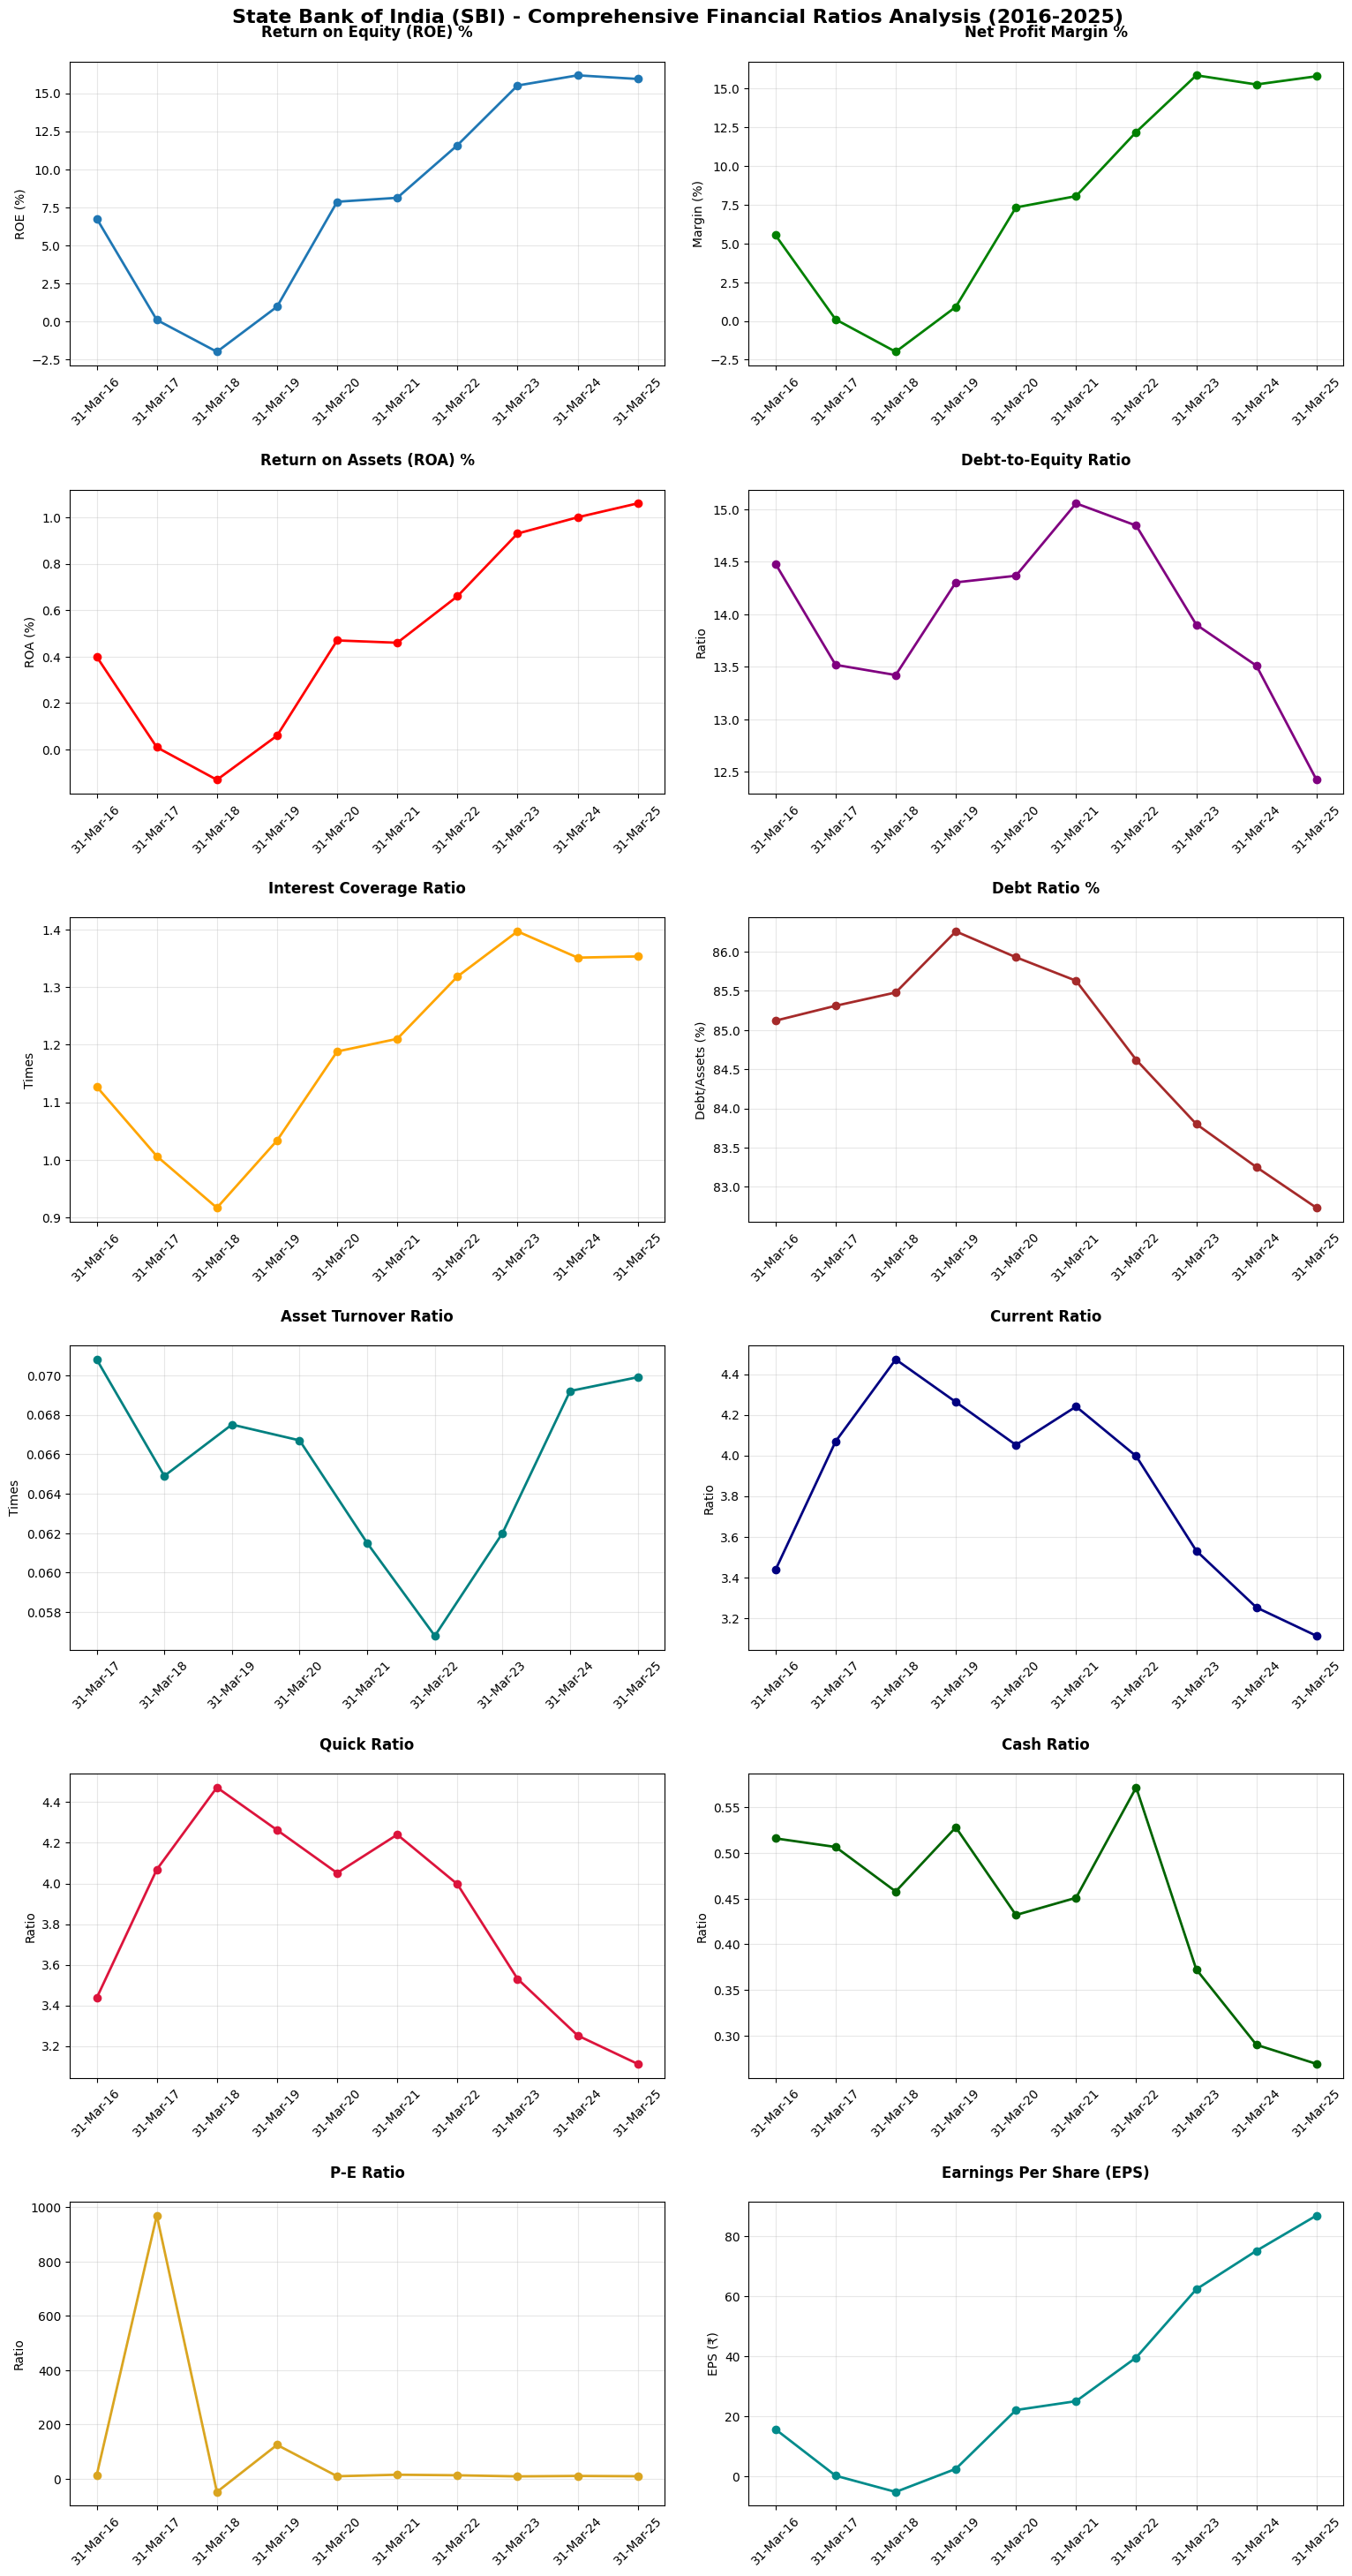

State Bank of India (SBI) - Comprehensive Financial Ratios (2016-2025)
                ROE  Net Profit Margin     ROA  Debt-to-Equity  \
Report Date                                                      
31-Mar-16    0.0677             0.0554  0.0040         14.4815   
31-Mar-17    0.0011             0.0010  0.0001         13.5188   
31-Mar-18   -0.0198            -0.0199 -0.0013         13.4215   
31-Mar-19    0.0098             0.0091  0.0006         14.3043   
31-Mar-20    0.0787             0.0733  0.0047         14.3673   
31-Mar-21    0.0813             0.0806  0.0046         15.0570   
31-Mar-22    0.1158             0.1220  0.0066         14.8454   
31-Mar-23    0.1550             0.1586  0.0093         13.9015   
31-Mar-24    0.1617             0.1527  0.0100         13.5108   
31-Mar-25    0.1593             0.1580  0.0106         12.4236   

             Interest Coverage  Debt Ratio  Asset Turnover  Current Ratio  \
Report Date                                                

In [7]:
# Create DataFrames from the provided SBI data
# Profit & Loss data
pl_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
                   '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Sales': [220632.75, 230447.1, 228970.28, 253322.17, 269851.66, 278115.48, 289972.69, 350844.58, 439188.51, 490937.79],
    'Net profit': [12224.6, 241.23, -4556.29, 2299.64, 19767.8, 22405.46, 35373.88, 55648.17, 67084.67, 77561.34],
    'Interest': [143047.36, 149114.67, 146602.98, 155867.46, 161123.8, 156010.17, 156194.34, 189980.82, 259736.05, 300943.34],
    'Profit before tax': [18176.79, 944.83, -12244.91, 5220.49, 30316.59, 32795.97, 49738.63, 75398.56, 91240.05, 106365.29]
}

# Balance Sheet data
bs_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
                   '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Equity Share Capital': [776.28, 797.35, 892.46, 892.46, 892.46, 892.46, 892.46, 892.46, 892.46, 892.46],
    'Reserves': [179816.09, 216394.8, 229429.49, 233603.2, 250167.66, 274669.1, 304695.58, 358038.86, 414046.71, 486144.3],
    'Borrowings': [2615256.95, 2936176.32, 3091257.62, 3354288.72, 3607061.3, 4149127.45, 4536570.38, 4989687.46, 5606146.99, 6050755.27],
    'Other Liabilities': [276472.16, 288391.04, 294859.6, 299675.65, 339364.31, 420925.83, 518719.42, 605795.73, 712669.43, 775937.87],
    'Total': [3072321.48, 3441759.51, 3616439.17, 3888460.03, 4197485.73, 4845614.84, 5360877.84, 5954414.51, 6733755.59, 7313729.9],
    'Cash & Bank': [142637.54, 146076.35, 134973.43, 158218.46, 146633.51, 189807.29, 296525.21, 225692.63, 206766.69, 208893.69],
    'Investments': [807374.58, 1027280.87, 1183794.24, 1119269.82, 1228284.28, 1595100.27, 1776489.9, 1913107.86, 2110548.23, 2205601.11]
}

# Market data
market_data = {
    'Report Date': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
                   '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    'Share Price': [194.25, 293.4, 249.9, 320.75, 196.85, 364.3, 493.55, 523.75, 752.35, 771.5],
    'Adjusted Equity Shares (Cr)': [776.28, 797.35, 892.46, 892.46, 892.46, 892.46, 892.46, 892.46, 892.46, 892.46]
}

pl_df = pd.DataFrame(pl_data)
bs_df = pd.DataFrame(bs_data)
market_df = pd.DataFrame(market_data)

# Convert to numeric and set date as index
for df in [pl_df, bs_df, market_df]:
    for col in df.columns:
        if col != 'Report Date':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    df.set_index('Report Date', inplace=True)

# Calculate ratios
ratios = {}

# 1. Return on Equity (ROE) = Net Income / Equity
ratios['ROE'] = pl_df['Net profit'] / (bs_df['Equity Share Capital'] + bs_df['Reserves'])

# 2. Net Profit Margin = Net Income / Revenue
ratios['Net Profit Margin'] = pl_df['Net profit'] / pl_df['Sales']

# 3. Return on Assets (ROA) = Net Income / Total Assets
ratios['ROA'] = pl_df['Net profit'] / bs_df['Total']

# 4. Debt-to-Equity Ratio = Total Debt / Shareholders' Equity
ratios['Debt-to-Equity'] = bs_df['Borrowings'] / (bs_df['Equity Share Capital'] + bs_df['Reserves'])

# 5. Interest Coverage Ratio = EBIT / Interest Expense
# EBIT = Profit before tax + Interest Expense
ratios['Interest Coverage'] = (pl_df['Profit before tax'] + pl_df['Interest']) / pl_df['Interest']

# 6. Debt Ratio = Total Debt / Total Assets
ratios['Debt Ratio'] = bs_df['Borrowings'] / bs_df['Total']

# 7. Asset Turnover = Net Sales / Average Total Assets
bs_df['Total Assets Avg'] = bs_df['Total'].rolling(window=2).mean()
ratios['Asset Turnover'] = pl_df['Sales'] / bs_df['Total Assets Avg']

# 8. Current Ratio = Current Assets / Current Liabilities
# For banks: Current Assets = Cash & Bank + Investments
ratios['Current Ratio'] = (bs_df['Cash & Bank'] + bs_df['Investments']) / bs_df['Other Liabilities']

# 9. Quick Ratio = (Current Assets – Inventory) / Current Liabilities
# Since banks don't have inventory, Quick Ratio = Current Ratio
ratios['Quick Ratio'] = ratios['Current Ratio']

# 10. Cash Ratio = Cash & Cash Equivalents / Current Liabilities
ratios['Cash Ratio'] = bs_df['Cash & Bank'] / bs_df['Other Liabilities']

# 11. P-E Ratio = Share Price / EPS
# EPS = Net Profit / Number of Shares (converted to Cr units)
ratios['EPS'] = pl_df['Net profit'] / market_df['Adjusted Equity Shares (Cr)']
ratios['P-E Ratio'] = market_df['Share Price'] / ratios['EPS']

# Create ratios DataFrame
ratios_df = pd.DataFrame(ratios)
ratios_df = ratios_df.round(4)

# Handle infinite values from negative earnings in P-E ratio
ratios_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create comprehensive visualizations with proper spacing
fig, axes = plt.subplots(6, 2, figsize=(16, 30))
fig.suptitle('State Bank of India (SBI) - Comprehensive Financial Ratios Analysis (2016-2025)', 
             fontsize=16, fontweight='bold', y=0.98)

# ROE
axes[0,0].plot(ratios_df.index, ratios_df['ROE'] * 100, marker='o', linewidth=2, markersize=6)
axes[0,0].set_title('Return on Equity (ROE) %', fontweight='bold', pad=20)
axes[0,0].set_ylabel('ROE (%)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Net Profit Margin
axes[0,1].plot(ratios_df.index, ratios_df['Net Profit Margin'] * 100, marker='o', linewidth=2, markersize=6, color='green')
axes[0,1].set_title('Net Profit Margin %', fontweight='bold', pad=20)
axes[0,1].set_ylabel('Margin (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# ROA
axes[1,0].plot(ratios_df.index, ratios_df['ROA'] * 100, marker='o', linewidth=2, markersize=6, color='red')
axes[1,0].set_title('Return on Assets (ROA) %', fontweight='bold', pad=20)
axes[1,0].set_ylabel('ROA (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Debt-to-Equity
axes[1,1].plot(ratios_df.index, ratios_df['Debt-to-Equity'], marker='o', linewidth=2, markersize=6, color='purple')
axes[1,1].set_title('Debt-to-Equity Ratio', fontweight='bold', pad=20)
axes[1,1].set_ylabel('Ratio')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Interest Coverage
axes[2,0].plot(ratios_df.index, ratios_df['Interest Coverage'], marker='o', linewidth=2, markersize=6, color='orange')
axes[2,0].set_title('Interest Coverage Ratio', fontweight='bold', pad=20)
axes[2,0].set_ylabel('Times')
axes[2,0].tick_params(axis='x', rotation=45)
axes[2,0].grid(True, alpha=0.3)

# Debt Ratio
axes[2,1].plot(ratios_df.index, ratios_df['Debt Ratio'] * 100, marker='o', linewidth=2, markersize=6, color='brown')
axes[2,1].set_title('Debt Ratio %', fontweight='bold', pad=20)
axes[2,1].set_ylabel('Debt/Assets (%)')
axes[2,1].tick_params(axis='x', rotation=45)
axes[2,1].grid(True, alpha=0.3)

# Asset Turnover
axes[3,0].plot(ratios_df.index[1:], ratios_df['Asset Turnover'][1:], marker='o', linewidth=2, markersize=6, color='teal')
axes[3,0].set_title('Asset Turnover Ratio', fontweight='bold', pad=20)
axes[3,0].set_ylabel('Times')
axes[3,0].tick_params(axis='x', rotation=45)
axes[3,0].grid(True, alpha=0.3)

# Current Ratio
axes[3,1].plot(ratios_df.index, ratios_df['Current Ratio'], marker='o', linewidth=2, markersize=6, color='navy')
axes[3,1].set_title('Current Ratio', fontweight='bold', pad=20)
axes[3,1].set_ylabel('Ratio')
axes[3,1].tick_params(axis='x', rotation=45)
axes[3,1].grid(True, alpha=0.3)

# Quick Ratio
axes[4,0].plot(ratios_df.index, ratios_df['Quick Ratio'], marker='o', linewidth=2, markersize=6, color='crimson')
axes[4,0].set_title('Quick Ratio', fontweight='bold', pad=20)
axes[4,0].set_ylabel('Ratio')
axes[4,0].tick_params(axis='x', rotation=45)
axes[4,0].grid(True, alpha=0.3)

# Cash Ratio
axes[4,1].plot(ratios_df.index, ratios_df['Cash Ratio'], marker='o', linewidth=2, markersize=6, color='darkgreen')
axes[4,1].set_title('Cash Ratio', fontweight='bold', pad=20)
axes[4,1].set_ylabel('Ratio')
axes[4,1].tick_params(axis='x', rotation=45)
axes[4,1].grid(True, alpha=0.3)

# P-E Ratio (excluding inf values)
pe_ratio_clean = ratios_df['P-E Ratio'].replace([np.inf, -np.inf], np.nan)
axes[5,0].plot(ratios_df.index, pe_ratio_clean, marker='o', linewidth=2, markersize=6, color='goldenrod')
axes[5,0].set_title('P-E Ratio', fontweight='bold', pad=20)
axes[5,0].set_ylabel('Ratio')
axes[5,0].tick_params(axis='x', rotation=45)
axes[5,0].grid(True, alpha=0.3)

# EPS
axes[5,1].plot(ratios_df.index, ratios_df['EPS'], marker='o', linewidth=2, markersize=6, color='darkcyan')
axes[5,1].set_title('Earnings Per Share (EPS)', fontweight='bold', pad=20)
axes[5,1].set_ylabel('EPS (₹)')
axes[5,1].tick_params(axis='x', rotation=45)
axes[5,1].grid(True, alpha=0.3)

# Adjust layout with more padding
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)
plt.subplots_adjust(top=0.96)  # Additional space for the main title

plt.show()

# Display the ratios table
print("State Bank of India (SBI) - Comprehensive Financial Ratios (2016-2025)")
print("="*100)
print(ratios_df)

# Prepare CSV output
ratios_csv = ratios_df.copy()
ratios_csv.reset_index(inplace=True)
print("\n" + "="*100)
print("CSV Data Ready for Export:")
print("="*100)
print(ratios_csv.to_string(index=False))

In [8]:


# Load the data
data = {
    'Year': ['31-Mar-16', '31-Mar-17', '31-Mar-18', '31-Mar-19', '31-Mar-20', 
             '31-Mar-21', '31-Mar-22', '31-Mar-23', '31-Mar-24', '31-Mar-25'],
    
    # P&L Data
    'Sales': [20849.45, 37816.09, 38832.31, 41462.91, 21024.94, 83181.86, 63564.5, 50478.13, 89683.04, 70778.14],
    'Net Profit': [1650.15, 1681.66, 1619.17, 1138.93, 1066.98, 956.16, 759.2, 813.49, 850.66, 1185.52],
    'Profit before tax': [1841.7, 1863.25, 1838.96, 1274.43, 1198.42, 1219.25, 960.92, 1084.55, 1028.34, 1581.81],
    'Interest': [0.06, 15.26, 20.15, 23.26, 0, 0, 0, 0, 0, 0],
    
    # Balance Sheet Data
    'Equity Share Capital': [1432.32, 1435.35, 1435.5, 1435.78, 1435.86, 1435.97, 1437.31, 1438.57, 1440.62, 1445.32],
    'Reserves': [3891.02, 4970.68, 5138.19, 5435.35, 5776.6, 7673.28, 7720.67, 8650.95, 9563.98, 10488.46],
    'Borrowings': [1028.94, 0, 0, 0, 0, 1200, 1200, 1200, 1200, 2600],
    'Total Assets': [104765, 124740.82, 141818.87, 163086.21, 156030.82, 217219.89, 244437.43, 255851.3, 299000.65, 314238.54],
    'Other Liabilities': [98412.72, 118334.79, 135245.18, 156215.08, 148818.36, 206910.64, 234079.45, 244561.78, 286796.05, 299704.76],
    'Cash & Bank': [200.23, 213.73, 203.81, 661.04, 811.92, 558.34, 670.93, 775.22, 837.74, 1007.17],
    'Receivables': [150.86, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    
    # Share and Price Data
    'No. of Equity Shares': [1432319348, 1435347110, 1435498710, 1435784481, 1435862591, 
                            1435974231, 1437306101, 1438571396, 1440616221, 1445321756],
    'Price': [382.4, 388.6, 350.25, 355.7, 445.6, 500.9, 435.7, 608.65, 564.35, None]  # 2025 price missing
}

df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Year'])

# Calculate ratios
df['Equity'] = df['Equity Share Capital'] + df['Reserves']
df['Current Assets'] = df['Cash & Bank'] + df['Receivables']

# Calculate EPS (Earnings Per Share)
# Convert number of shares to crores (divide by 1,00,00,000)
df['No. of Equity Shares (Cr)'] = df['No. of Equity Shares'] / 10000000
df['EPS'] = df['Net Profit'] / df['No. of Equity Shares (Cr)']

# Core Profitability Ratios
df['ROE'] = (df['Net Profit'] / df['Equity']) * 100
df['Net Profit Margin'] = (df['Net Profit'] / df['Sales']) * 100
df['ROA'] = (df['Net Profit'] / df['Total Assets']) * 100

# Leverage Ratios
df['Debt-to-Equity'] = df['Borrowings'] / df['Equity']
df['Debt Ratio'] = df['Borrowings'] / df['Total Assets']

# Interest Coverage (only for years with interest expense)
df['Interest Coverage'] = np.where(df['Interest'] > 0, df['Profit before tax'] / df['Interest'], np.nan)

# Efficiency Ratios
df['Asset Turnover'] = df['Sales'] / df['Total Assets']

# Liquidity Ratios
df['Current Ratio'] = df['Current Assets'] / df['Other Liabilities']
df['Quick Ratio'] = df['Current Assets'] / df['Other Liabilities']  # Same as Current Ratio (no inventory)
df['Cash Ratio'] = df['Cash & Bank'] / df['Other Liabilities']

# Valuation Ratios
df['P-E Ratio'] = df['Price'] / df['EPS']

print("Financial Ratios Calculation Complete (with EPS)")
print("\nSample data with EPS:")
print(df[['Year', 'Net Profit', 'No. of Equity Shares (Cr)', 'EPS', 'P-E Ratio']].head(3))

Financial Ratios Calculation Complete (with EPS)

Sample data with EPS:
        Year  Net Profit  No. of Equity Shares (Cr)        EPS  P-E Ratio
0 2016-03-31     1650.15                 143.231935  11.520825  33.192069
1 2017-03-31     1681.66                 143.534711  11.716051  33.168172
2 2018-03-31     1619.17                 143.549871  11.279495  31.051923


C:\Users\sanja\AppData\Local\Temp\ipykernel_30128\2611213923.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Year'])


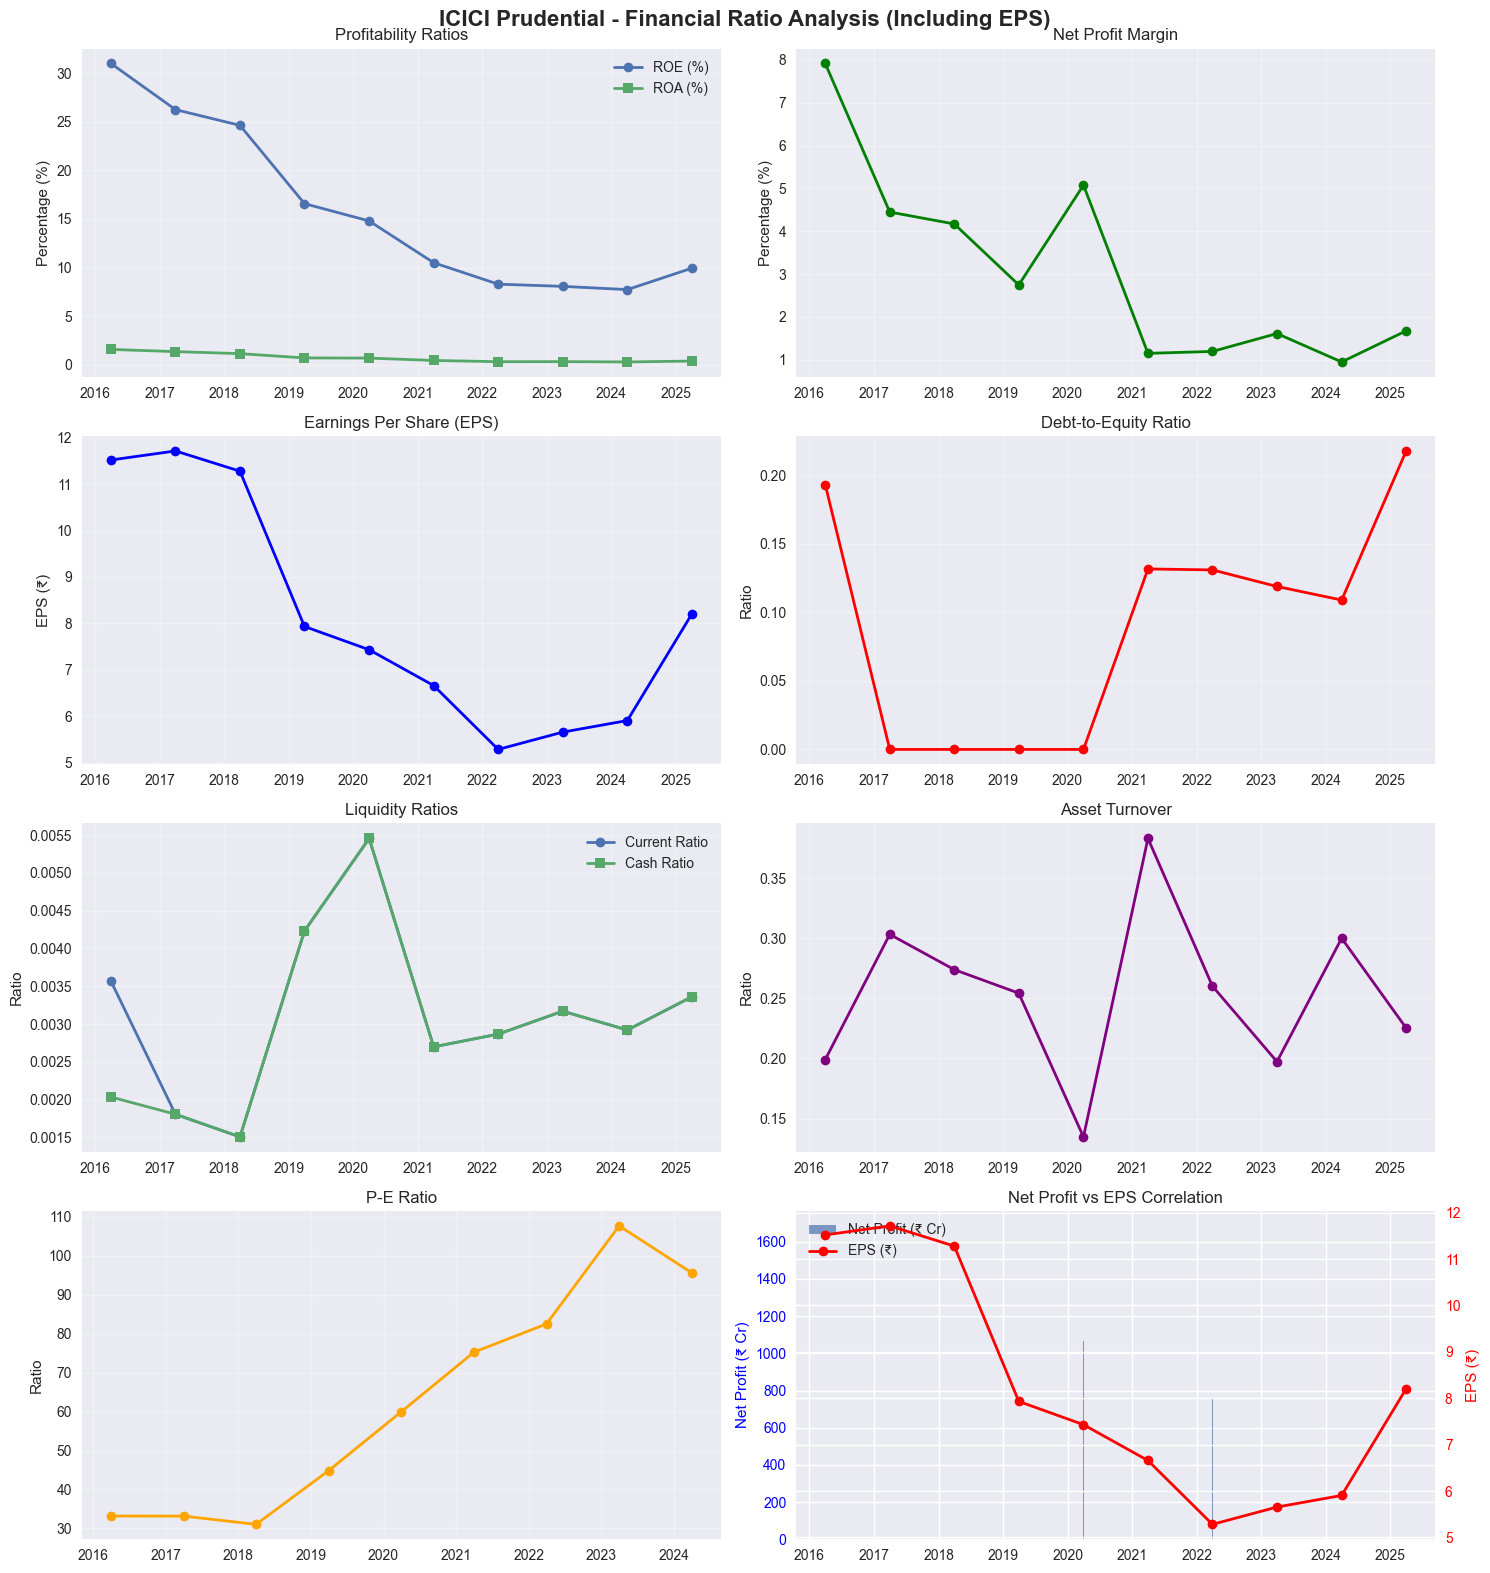


KEY RATIOS SUMMARY (2016-2024) - INCLUDING EPS
       ROE (%)  Net Profit Margin (%)  ROA (%)  EPS (₹)  Debt-to-Equity  \
count   10.000                 10.000   10.000   10.000          10.000   
mean    15.776                  3.093    0.718    8.158           0.090   
std      8.588                  2.272    0.474    2.498           0.084   
min      7.730                  0.949    0.285    5.282           0.000   
25%      8.701                  1.299    0.333    6.093           0.000   
50%     12.645                  2.211    0.562    7.682           0.114   
75%     22.617                  4.378    1.031   10.510           0.132   
max     30.998                  7.915    1.575   11.716           0.218   

       Current Ratio  Asset Turnover  
count         10.000          10.000  
mean           0.003           0.253  
std            0.001           0.069  
min            0.002           0.135  
25%            0.003           0.206  
50%            0.003           0.257  
75%

In [9]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
fig.suptitle('ICICI Prudential - Financial Ratio Analysis (Including EPS)', fontsize=16, fontweight='bold')

# 1. Profitability Ratios
axes[0,0].plot(df['Year'], df['ROE'], marker='o', linewidth=2, label='ROE (%)')
axes[0,0].plot(df['Year'], df['ROA'], marker='s', linewidth=2, label='ROA (%)')
axes[0,0].set_title('Profitability Ratios')
axes[0,0].set_ylabel('Percentage (%)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Net Profit Margin
axes[0,1].plot(df['Year'], df['Net Profit Margin'], marker='o', linewidth=2, color='green')
axes[0,1].set_title('Net Profit Margin')
axes[0,1].set_ylabel('Percentage (%)')
axes[0,1].grid(True, alpha=0.3)

# 3. EPS Trend
axes[1,0].plot(df['Year'], df['EPS'], marker='o', linewidth=2, color='blue')
axes[1,0].set_title('Earnings Per Share (EPS)')
axes[1,0].set_ylabel('EPS (₹)')
axes[1,0].grid(True, alpha=0.3)

# 4. Leverage Ratios
axes[1,1].plot(df['Year'], df['Debt-to-Equity'], marker='o', linewidth=2, color='red')
axes[1,1].set_title('Debt-to-Equity Ratio')
axes[1,1].set_ylabel('Ratio')
axes[1,1].grid(True, alpha=0.3)

# 5. Liquidity Ratios
axes[2,0].plot(df['Year'], df['Current Ratio'], marker='o', linewidth=2, label='Current Ratio')
axes[2,0].plot(df['Year'], df['Cash Ratio'], marker='s', linewidth=2, label='Cash Ratio')
axes[2,0].set_title('Liquidity Ratios')
axes[2,0].set_ylabel('Ratio')
axes[2,0].legend()
axes[2,0].grid(True, alpha=0.3)

# 6. Efficiency Ratio
axes[2,1].plot(df['Year'], df['Asset Turnover'], marker='o', linewidth=2, color='purple')
axes[2,1].set_title('Asset Turnover')
axes[2,1].set_ylabel('Ratio')
axes[2,1].grid(True, alpha=0.3)

# 7. P-E Ratio (excluding 2025)
pe_data = df[df['P-E Ratio'].notna()]
axes[3,0].plot(pe_data['Year'], pe_data['P-E Ratio'], marker='o', linewidth=2, color='orange')
axes[3,0].set_title('P-E Ratio')
axes[3,0].set_ylabel('Ratio')
axes[3,0].grid(True, alpha=0.3)

# 8. Net Profit vs EPS Correlation
axes[3,1].bar(df['Year'], df['Net Profit'], alpha=0.7, label='Net Profit (₹ Cr)')
axes[3,1].set_ylabel('Net Profit (₹ Cr)', color='blue')
axes[3,1].tick_params(axis='y', labelcolor='blue')
ax2 = axes[3,1].twinx()
ax2.plot(df['Year'], df['EPS'], color='red', marker='o', linewidth=2, label='EPS (₹)')
ax2.set_ylabel('EPS (₹)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
axes[3,1].set_title('Net Profit vs EPS Correlation')
lines1, labels1 = axes[3,1].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[3,1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Display summary statistics
print("\n" + "="*60)
print("KEY RATIOS SUMMARY (2016-2024) - INCLUDING EPS")
print("="*60)

summary_ratios = {
    'ROE (%)': df['ROE'].describe(),
    'Net Profit Margin (%)': df['Net Profit Margin'].describe(),
    'ROA (%)': df['ROA'].describe(),
    'EPS (₹)': df['EPS'].describe(),
    'Debt-to-Equity': df['Debt-to-Equity'].describe(),
    'Current Ratio': df['Current Ratio'].describe(),
    'Asset Turnover': df['Asset Turnover'].describe()
}

summary_df = pd.DataFrame(summary_ratios)
print(summary_df.round(3))

In [5]:
# Create a comprehensive table of all ratios for CSV export
ratio_df = pd.DataFrame({
    'Year': df['Year'].dt.year,
    'ROE_%': df['ROE'].round(2),
    'Net_Profit_Margin_%': df['Net Profit Margin'].round(2),
    'ROA_%': df['ROA'].round(2),
    'Debt_to_Equity_Ratio': df['Debt-to-Equity'].round(4),
    'Debt_Ratio': df['Debt Ratio'].round(4),
    'Interest_Coverage_Ratio': df['Interest Coverage'].round(2),
    'Asset_Turnover_Ratio': df['Asset Turnover'].round(4),
    'Current_Ratio': df['Current Ratio'].round(4),
    'Quick_Ratio': df['Quick Ratio'].round(4),
    'Cash_Ratio': df['Cash Ratio'].round(4),
    'P_E_Ratio': df['P-E Ratio'].round(2)
})

print("COMPREHENSIVE RATIOS TABLE")
print("="*80)
print(ratio_df.to_string(index=False))

# Highlight key trends
print("\n" + "="*80)
print("KEY TRENDS AND OBSERVATIONS")
print("="*80)
print("1. PROFITABILITY:")
print(f"   - ROE: Declined from {df['ROE'].iloc[0]:.1f}% (2016) to {df['ROE'].iloc[-2]:.1f}% (2024)")
print(f"   - Net Profit Margin: Ranged between {df['Net Profit Margin'].min():.1f}% to {df['Net Profit Margin'].max():.1f}%")

print("\n2. LEVERAGE:")
print(f"   - Debt-to-Equity: Mostly conservative (0.0-0.2 range), spiked to {df['Debt-to-Equity'].iloc[-1]:.2f} in 2025")

print("\n3. LIQUIDITY:")
print(f"   - Current Ratio: Very low (avg {df['Current Ratio'].mean():.4f}), typical for insurance companies")
print(f"   - Cash Ratio: Minimal cash coverage (avg {df['Cash Ratio'].mean():.4f})")

print("\n4. EFFICIENCY:")
print(f"   - Asset Turnover: Ranged between {df['Asset Turnover'].min():.3f} to {df['Asset Turnover'].max():.3f}")

print("\n5. VALUATION:")
print(f"   - P-E Ratio: Averaged around {pe_data['P-E Ratio'].mean():.1f} (2017-2024)")

COMPREHENSIVE RATIOS TABLE
 Year  ROE_%  Net_Profit_Margin_%  ROA_%  Debt_to_Equity_Ratio  Debt_Ratio  Interest_Coverage_Ratio  Asset_Turnover_Ratio  Current_Ratio  Quick_Ratio  Cash_Ratio  P_E_Ratio
 2016  31.00                 7.91   1.58                0.1933      0.0098                 30695.00                0.1990         0.0036       0.0036      0.0020      33.19
 2017  26.25                 4.45   1.35                0.0000      0.0000                   122.10                0.3032         0.0018       0.0018      0.0018      33.17
 2018  24.63                 4.17   1.14                0.0000      0.0000                    91.26                0.2738         0.0015       0.0015      0.0015      31.05
 2019  16.58                 2.75   0.70                0.0000      0.0000                    54.79                0.2542         0.0042       0.0042      0.0042      44.84
 2020  14.79                 5.07   0.68                0.0000      0.0000                      NaN         